In [391]:
%run ego.py

In [392]:
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt("dat_train.txt")

scaler = StandardScaler()
scaled = scaler.fit_transform(data)

X = scaled[:,1:]
y = scaled[:,0].reshape((-1,1))

In [393]:
sig = np.ones(X.shape[1])

krig = Kriging(sig)
krig.fit(X, y)

In [394]:
np.sum((krig.yhat(X) - y)**2)

0.36149566701562236

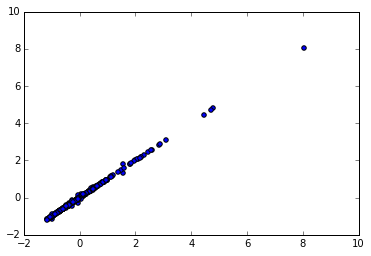

In [395]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(krig.yhat(X), y)


In [396]:
x_in = np.random.rand(9)
y_out = krig.yhat(x_in)
f_out = krig.f(x_in)
print f_out
print x_in.shape, y_out[0]
print scaler.inverse_transform(np.concatenate((y_out[0], x_in)))[0]

[[ 0.69299723]]
(9L,) [-0.0411379]
32770.821434


In [397]:
krig.yhat(np.random.rand(9))

array([[ 0.10374296]])

In [398]:
len(x_in)

9

(39L, 10L)


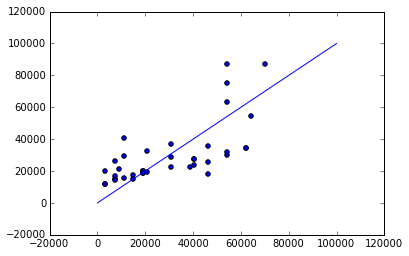

In [399]:
#import the test data
test = np.genfromtxt("dat_test.txt") 
print test.shape
test_scaled = scaler.transform(test)
Xt = test_scaled[:,1:]
#print test[:,1:].mean(axis=0)
yt_scale = test_scaled[:,0]
yt = test[:,0]

yt_out = scaler.inverse_transform(np.column_stack((Xt, krig.yhat(Xt))))[:,0]
plt.scatter(yt_out, yt)
plt.plot(np.linspace(0,100000), np.linspace(0,100000))

In [400]:
np.sqrt(np.sum((yt_out - yt)**2))

96993.812594581846

In [385]:
# sig = np.eye(X.shape[1])
# sig = np.diag(np.random.rand(X.shape[1]))
# krig2 = Kriging(sig)
# obj = 0.
# krig2.fit(X[:1],y[:1])

# for i,x in enumerate(X,2):
#     #print i
#     f_current = krig2.f(x)
#     krig2.fit(X[:i-1],y[:i-1])
#     #f_current = krig2.f(x)
#     #print f_current[0,0]
#     obj += np.nan_to_num(f_current[0,0])
# print obj
    

In [402]:
#krig.obj(np.ones(X.shape[1]))

krig.obj(np.random.rand(X.shape[1]))

194.2196137835094

In [389]:
np.diag(1/np.random.rand(X.shape[1]))

array([[ 3.49775567,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.93960088,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.08966216,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.0516656 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.55975495,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         6.9033417 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.33312554,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [403]:
from sklearn.externals import joblib
joblib.dump()

In [430]:
%run preprocess.py

In [432]:
pre = Preprocess(pca_model='eco_full_pca.pkl', all_dat='all_games.pkl')
#pre.get_json("alluser_control.json")

In [434]:
#pre.train_pca()
X, y = pre.ready_player_one(1)

In [435]:
X.shape

(239L, 30L)

In [436]:
rKrig = Kriging(np.ones(30))
rKrig.fit(X,y)


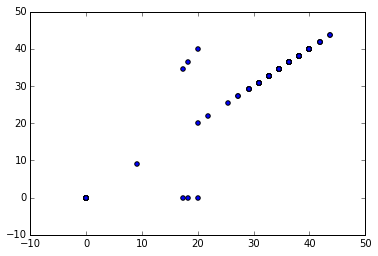

In [440]:
plt.scatter(rKrig.yhat(X), y)

In [447]:
rKrig.yhat(X) - y

array([  0.00000000e+00,   1.77635684e-14,   4.97379915e-14,
        -2.13162821e-14,   1.77635684e-14,  -4.97379915e-14,
        -5.32907052e-14,  -7.10542736e-15,   8.17124146e-14,
         5.50670620e-14,  -3.01980663e-14,   6.39488462e-14,
        -3.37507799e-14,  -2.48689958e-14,   2.48689958e-14,
        -3.90798505e-14,  -7.10542736e-15,   1.20792265e-13,
        -3.37507799e-14,   0.00000000e+00,   5.32907052e-14,
         2.13162821e-14,  -8.70414851e-14,   2.66453526e-14,
         4.97379915e-14,   2.84217094e-14,   4.97379915e-14,
         2.13162821e-14,   4.97379915e-14,  -1.65201186e-13,
         8.52651283e-14,  -7.10542736e-15,   3.55271368e-14,
         1.42108547e-14,  -4.61852778e-14,   9.94759830e-14,
        -7.10542736e-15,  -5.68434189e-14,  -7.10542736e-14,
         3.55271368e-14,  -3.37507799e-14,  -3.37507799e-14,
         1.42108547e-14,  -3.90798505e-14,   1.06581410e-14,
         2.66453526e-14,  -1.77635684e-14,  -3.19744231e-14,
         0.00000000e+00,

In [449]:
%timeit rKrig.obj(np.ones(30))

1 loops, best of 3: 2.28 s per loop
